In [10]:
# kaggle - https://www.kaggle.com/datasets/rj2497/sale-forecasting-data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# Load the datasets using pandas' read_excel function
sales_pipeline = pd.read_excel('../data/sales-pipeline.xlsx')
interactions = pd.read_excel('../data/interactions.xlsx')

In [15]:
# sales_pipeline.info()
interactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316776 entries, 0 to 316775
Data columns (total 6 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   interactionID                    316776 non-null  int64         
 1   fromEmailId                      316776 non-null  object        
 2   toEmailId                        316776 non-null  object        
 3   InteractionDate                  316776 non-null  datetime64[ns]
 4   InteractionType(Call/Email/SMS)  316776 non-null  object        
 5   Extracted Interaction Text       316776 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 14.5+ MB


In [54]:
#sales_pipeline.head()
interactions.head()

,interactionID,fromEmailId,toEmailId,InteractionDate,InteractionType(Call/Email/SMS),Extracted Interaction Text
0,8842411,gladys@piedpiper.com,kristle@dontechi.com,2016-01-04,Call,I thoroughly enjoyed your presentation yesterd...
1,8015509,donn@piedpiper.com,orpha@umbrellacorporation.com,2016-01-04,Call,speaking with you and your staff will be a tre...
2,5976842,kary@piedpiper.com,claribel@goodsilron.com,2016-01-04,Email,"However, I am unable to join because of my fam..."
3,1471794,boris@piedpiper.com,gordon@scotfind.com,2016-01-04,Call,We are extremely sorry to inform you that we h...
4,4330320,darcel@piedpiper.com,benny@treequote.com,2016-01-04,Call,I don't think it's possible for me to meet you


In [55]:
sales_pipeline.head()

,Account,Opportunity_ID,Sales_Agent,SalesAgentEmailID,ContactEmailID,Deal_Stage,Product,Close_Value,Created Date,Close Date,DateDiff
0,Konex,3KR50X38,Corliss Cosme,corliss@piedpiper.com,delila@konex.com,Won,GTX Plus Basic,1255,2016-01-04,2016-05-24,141
1,Finjob,YFS5KLJJ,Rosalina Dieter,rosalina@piedpiper.com,belinda@finjob.com,Won,MG Special,45,2016-01-04,2016-11-02,303
2,Kinnamplus,N0ONCYVZ,Donn Cantrell,donn@piedpiper.com,monte@kinnamplus.com,Lost,MG Special,1054,2016-01-06,2016-12-07,336
3,Genco Pura Olive Oil Company,IBEUTCSW,James Ascencio,james@piedpiper.com,karole@gencopuraoliveoilcompany.com,In Progress,MG Advanced,1054,2016-01-06,2016-09-11,249
4,Initech,G8AO5FA2,Wilburn Farren,wilburn@piedpiper.com,alejandro@initech.com,Lost,MG Advanced,517,2016-01-06,2016-09-18,256


In [17]:
# sales_pipeline.describe()
interactions.describe()

,interactionID,InteractionDate
count,3.167760e+05,316776
mean,5.497412e+06,2017-10-18 08:39:11.359951872
min,1.000070e+06,2016-01-04 00:00:00
25%,3.254082e+06,2016-11-26 00:00:00
50%,5.493879e+06,2017-10-19 00:00:00
75%,7.737752e+06,2018-09-10 00:00:00
max,9.999971e+06,2019-08-01 00:00:00
std,2.593770e+06,NaN


C:\Users\maric\AppData\Local\Temp\ipykernel_10984\2571984090.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=deal_stage_counts.index, y=deal_stage_counts.values, palette="Blues_d")


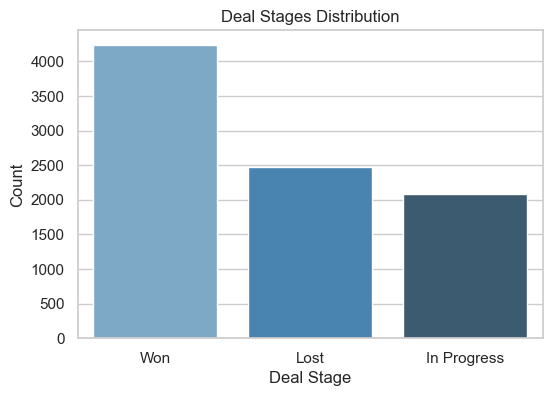

In [18]:
deal_stage_counts = sales_pipeline['Deal_Stage'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=deal_stage_counts.index, y=deal_stage_counts.values, palette="Blues_d")
plt.title('Deal Stages Distribution')
plt.xlabel('Deal Stage')
plt.ylabel('Count')
plt.show()

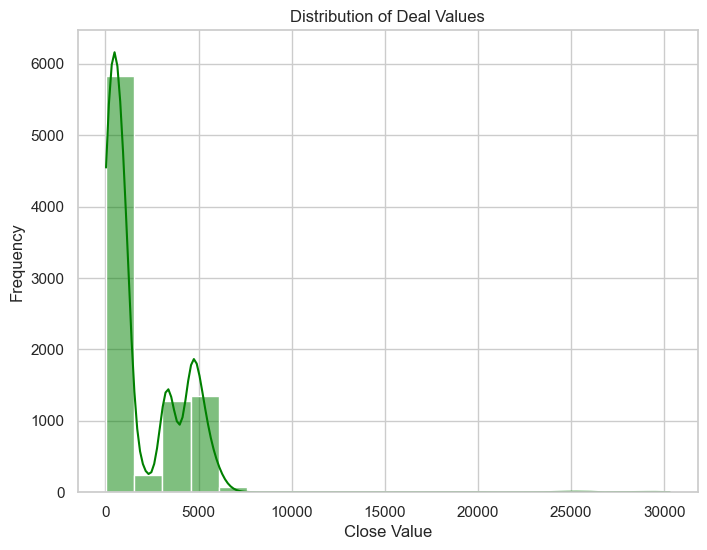

In [19]:
plt.figure(figsize=(8,6))
sns.histplot(sales_pipeline['Close_Value'], kde=True, bins=20, color='green')
plt.title('Distribution of Deal Values')
plt.xlabel('Close Value')
plt.ylabel('Frequency')
plt.show()

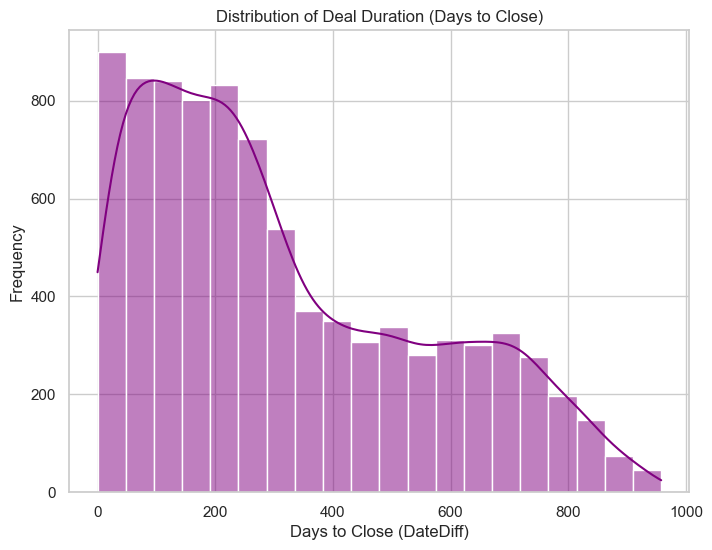

In [20]:
plt.figure(figsize=(8,6))
sns.histplot(sales_pipeline['DateDiff'], kde=True, bins=20, color='purple')
plt.title('Distribution of Deal Duration (Days to Close)')
plt.xlabel('Days to Close (DateDiff)')
plt.ylabel('Frequency')
plt.show()


C:\Users\maric\AppData\Local\Temp\ipykernel_10984\4058235371.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_sales.index, y=product_sales.values, palette="viridis")


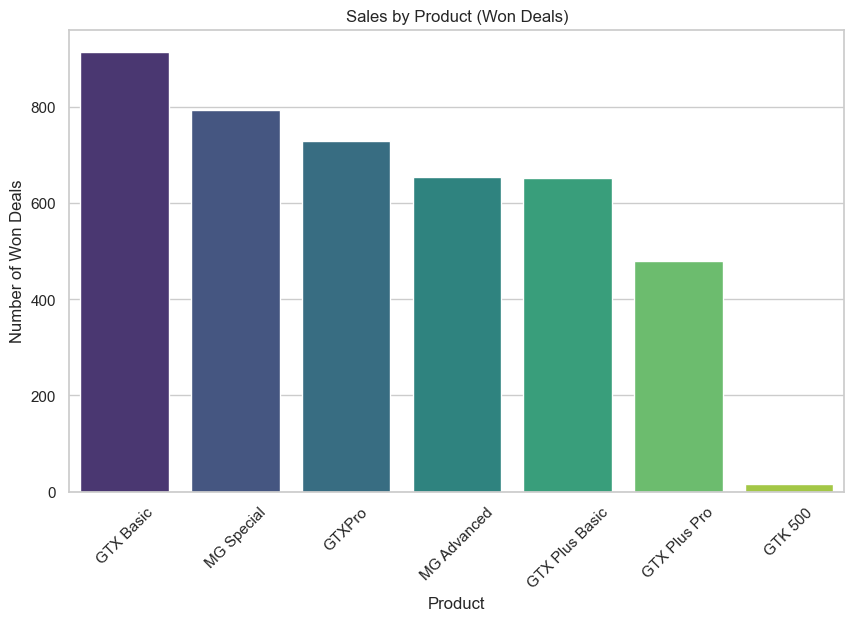

In [21]:
won_deals = sales_pipeline[sales_pipeline['Deal_Stage'] == 'Won']
product_sales = won_deals['Product'].value_counts()

plt.figure(figsize=(10,6))
sns.barplot(x=product_sales.index, y=product_sales.values, palette="viridis")
plt.title('Sales by Product (Won Deals)')
plt.xlabel('Product')
plt.ylabel('Number of Won Deals')
plt.xticks(rotation=45)
plt.show()


C:\Users\maric\AppData\Local\Temp\ipykernel_10984\3097909052.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=interaction_type_counts.index, y=interaction_type_counts.values, palette="Set2")


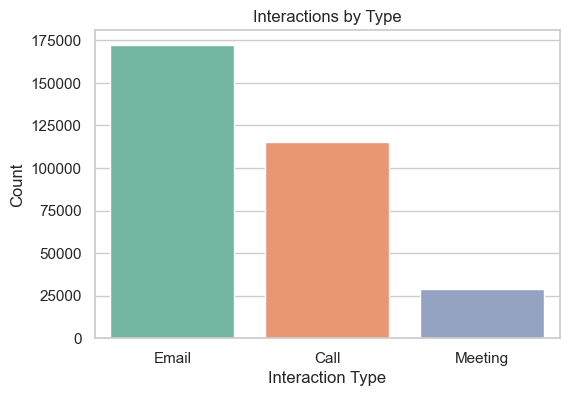

In [22]:
interaction_type_counts = interactions['InteractionType(Call/Email/SMS)'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=interaction_type_counts.index, y=interaction_type_counts.values, palette="Set2")
plt.title('Interactions by Type')
plt.xlabel('Interaction Type')
plt.ylabel('Count')
plt.show()

# TEXT INTERACTION 

In [65]:
# Merge based on sales agent (fromEmailId) and contact (toEmailId) to capture all relevant interactions
merged_data = pd.merge(sales_pipeline, interactions, 
                       left_on=['SalesAgentEmailID', 'ContactEmailID'], 
                       right_on=['fromEmailId', 'toEmailId'], 
                       how='inner')


# Create DataFrames for won and lost interactions
won_interactions = merged_data[merged_data['Deal_Stage'] == 'Won'].copy()
lost_interactions = merged_data[merged_data['Deal_Stage'] == 'Lost'].copy()

# Now you can proceed with the text cleaning process

# Display the first few rows of the merged data
display(merged_data.head())


,Account,Opportunity_ID,Sales_Agent,SalesAgentEmailID,ContactEmailID,Deal_Stage,Product,Close_Value,Created Date,Close Date,DateDiff,interactionID,fromEmailId,toEmailId,InteractionDate,InteractionType(Call/Email/SMS),Extracted Interaction Text
0,Konex,3KR50X38,Corliss Cosme,corliss@piedpiper.com,delila@konex.com,Won,GTX Plus Basic,1255,2016-01-04,2016-05-24,141,3357865,corliss@piedpiper.com,delila@konex.com,2016-01-15,Call,We are writing from GHF regarding the previous...
1,Konex,3KR50X38,Corliss Cosme,corliss@piedpiper.com,delila@konex.com,Won,GTX Plus Basic,1255,2016-01-04,2016-05-24,141,4494907,corliss@piedpiper.com,delila@konex.com,2016-01-17,Email,I had asked you to send the progress on the pr...
2,Konex,3KR50X38,Corliss Cosme,corliss@piedpiper.com,delila@konex.com,Won,GTX Plus Basic,1255,2016-01-04,2016-05-24,141,1661247,corliss@piedpiper.com,delila@konex.com,2016-01-20,Call,"I wish to commend your receptionist, Jany Dan,..."
3,Konex,3KR50X38,Corliss Cosme,corliss@piedpiper.com,delila@konex.com,Won,GTX Plus Basic,1255,2016-01-04,2016-05-24,141,7521235,corliss@piedpiper.com,delila@konex.com,2016-01-30,Call,I need to cancel the appointment I made to you...
4,Konex,3KR50X38,Corliss Cosme,corliss@piedpiper.com,delila@konex.com,Won,GTX Plus Basic,1255,2016-01-04,2016-05-24,141,7856100,corliss@piedpiper.com,delila@konex.com,2016-01-30,Email,Congratulations! Your hard work has paid off! ...


In [66]:
# Group by Opportunity_ID and Deal_Stage to count interactions per deal
interaction_counts = merged_data.groupby(['Opportunity_ID', 'Deal_Stage']).size().reset_index(name='Interaction_Count')

# Preview the result
display(interaction_counts.head())

,Opportunity_ID,Deal_Stage,Interaction_Count
0,0000I7AO,Won,121
1,00400B1S,In Progress,67
2,005JS57S,Won,100
3,00KY25OA,Won,102
4,00X8VEYH,Won,95


In [67]:
# Calculate the average number of interactions for each deal stage (Won, Lost, In Progress)
avg_interactions = interaction_counts.groupby('Deal_Stage')['Interaction_Count'].mean()

# Display the average interactions per deal stage
print("\nAverage number of interactions per deal stage:")
print(avg_interactions)


Average number of interactions per deal stage:
Deal_Stage
In Progress     80.453806
Lost           105.385362
Won            104.643228
Name: Interaction_Count, dtype: float64


C:\Users\maric\AppData\Local\Temp\ipykernel_10984\3804043632.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Deal_Stage', y='Interaction_Count', data=interaction_counts, palette='Set3')


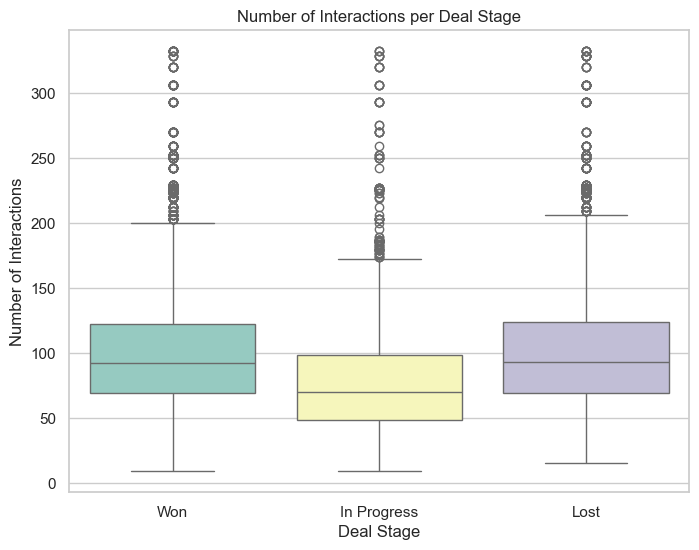

In [68]:
# Plot the number of interactions per deal stage
plt.figure(figsize=(8, 6))
sns.boxplot(x='Deal_Stage', y='Interaction_Count', data=interaction_counts, palette='Set3')
plt.title('Number of Interactions per Deal Stage')
plt.xlabel('Deal Stage')
plt.ylabel('Number of Interactions')
plt.show()


In [69]:
# Text Cleaning and Stopword Removal
from nltk.corpus import stopwords
from collections import Counter
import re

# Get the list of stopwords
stop_words = set(stopwords.words('english'))

# Helper function to clean and tokenize text while removing stopwords
def clean_text(text):
    text = text.lower()  # Convert text to lowercase
    text = re.sub(r'\W+', ' ', text)  # Remove non-word characters
    words = text.split()  # Split the text into words
    return [word for word in words if word not in stop_words]  # Remove stopwords

# Apply text cleaning for both won and lost deals
won_interactions['cleaned_text'] = won_interactions['Extracted Interaction Text'].apply(lambda x: ' '.join(clean_text(x)))
lost_interactions['cleaned_text'] = lost_interactions['Extracted Interaction Text'].apply(lambda x: ' '.join(clean_text(x)))

# Join all text for each deal stage
won_text = ' '.join(won_interactions['cleaned_text'])
lost_text = ' '.join(lost_interactions['cleaned_text'])

# Get word frequencies after filtering stopwords
won_word_freq = Counter(won_text.split())
lost_word_freq = Counter(lost_text.split())

# Visualizing Word Frequencies
won_top_words = won_word_freq.most_common(10)
lost_top_words = lost_word_freq.most_common(10)
won_words, won_frequencies = zip(*won_top_words)
lost_words, lost_frequencies = zip(*lost_top_words)


C:\Users\maric\AppData\Local\Temp\ipykernel_10984\25186009.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=won_frequencies, y=won_words, palette='Blues_d')
C:\Users\maric\AppData\Local\Temp\ipykernel_10984\25186009.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=lost_frequencies, y=lost_words, palette='Reds_d')


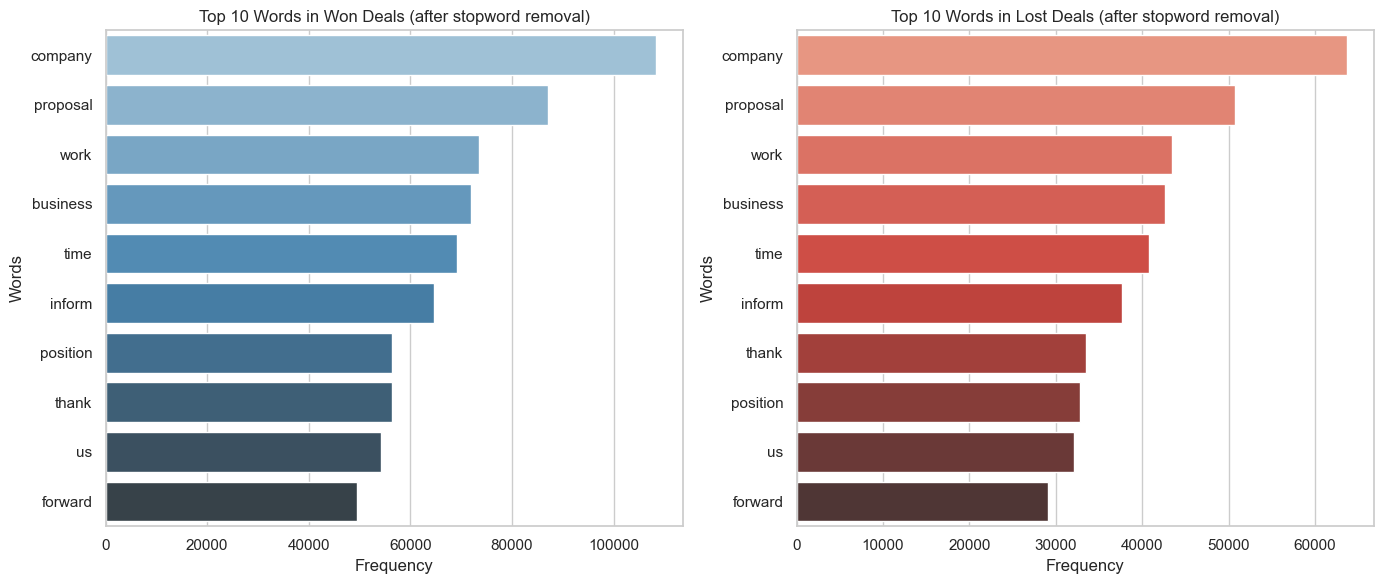

In [70]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=won_frequencies, y=won_words, palette='Blues_d')
plt.title('Top 10 Words in Won Deals (after stopword removal)')
plt.xlabel('Frequency')
plt.ylabel('Words')

plt.subplot(1, 2, 2)
sns.barplot(x=lost_frequencies, y=lost_words, palette='Reds_d')
plt.title('Top 10 Words in Lost Deals (after stopword removal)')
plt.xlabel('Frequency')
plt.ylabel('Words')

plt.tight_layout()
plt.show()


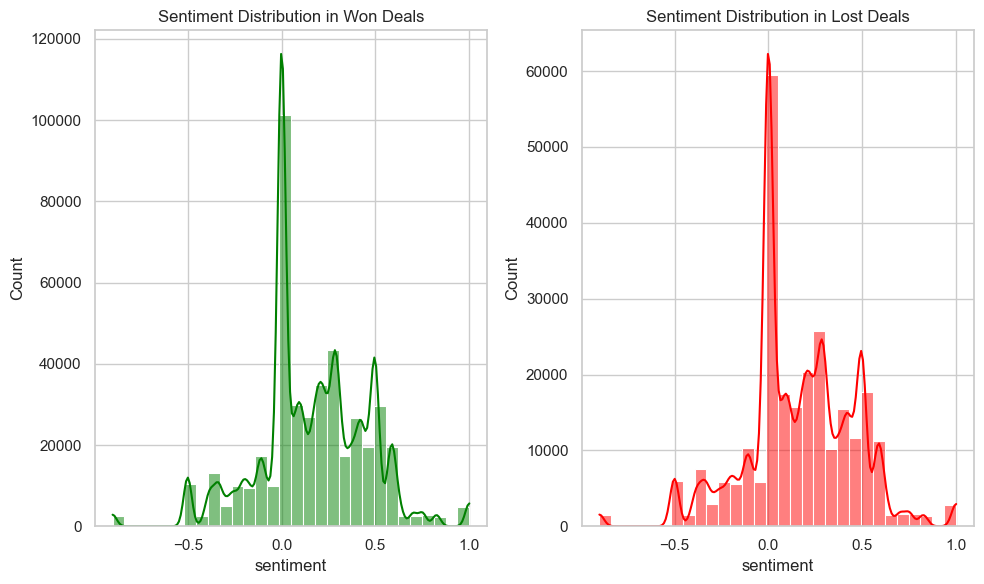

In [71]:
# Sentiment Analysis
from textblob import TextBlob
won_interactions['sentiment'] = won_interactions['Extracted Interaction Text'].apply(lambda x: TextBlob(x).sentiment.polarity)
lost_interactions['sentiment'] = lost_interactions['Extracted Interaction Text'].apply(lambda x: TextBlob(x).sentiment.polarity)

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.histplot(won_interactions['sentiment'], bins=30, kde=True, color='green')
plt.title('Sentiment Distribution in Won Deals')

plt.subplot(1, 2, 2)
sns.histplot(lost_interactions['sentiment'], bins=30, kde=True, color='red')
plt.title('Sentiment Distribution in Lost Deals')

plt.tight_layout()
plt.show()


In [72]:
# Topic Modeling (LDA)
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = vectorizer.fit_transform(won_interactions['cleaned_text'])

lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(dtm)

def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx + 1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 10
tf_feature_names = vectorizer.get_feature_names_out()
display_topics(lda, tf_feature_names, no_top_words)

Topic 1:
inform time regret work proposal company unfortunately position effective convinced
Topic 2:
company work thank position product relationship marketing business hope conference
Topic 3:
company proposal forward received inform work know thank business look
Topic 4:
time proposal company accept able like effective project meet contract
Topic 5:
business proposal company meeting time project forward years letter new
